In [1]:
import requests
import json

url = "http://34.101.35.54/v1/models/predict"

payload = json.dumps({
  "people_img_url": "https://storage.googleapis.com/ddd-file-storage/survey/1821406/17d51cd4-60d6-4431-a2be-cf21542a9f00.jpeg",
})
headers = {
  'accept': 'application/json',
  'ml_token': '1234567890',
  'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)
print(response.text)
response = ast.literal_eval(response.text)['prediction']
response = ast.literal_eval(response[response.find('['):response.find(']')+1])

{"prediction":"(Category tensor(1), tensor(1), tensor([0.2828, 0.7172]))"}


In [5]:
import ast
ast.literal_eval(response.text)['prediction']

'(Category tensor(1), tensor(1), tensor([0.2828, 0.7172]))'

In [6]:
response = ast.literal_eval(response.text)['prediction']

In [16]:
ast.literal_eval(response[response.find('['):response.find(']')+1])

0.2828

In [2]:
import numpy as np
import pandas as pd
import requests
import json
import ast
import time
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [3]:
df_master = pd.read_csv('face_to_default_data_pull_2022_08_19.csv')
df_master.head(10)

,loan_id,flag_bl,photo_client_square,photo_ktp
0,1842878.0,0,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...
1,1805815.0,0,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...
2,1713523.0,0,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...
3,1824919.0,0,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...
4,1747058.0,0,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...
5,1762495.0,0,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...
6,1763548.0,0,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...
7,1812376.0,0,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...
8,1750537.0,0,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...
9,1693673.0,0,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...


In [4]:
url = "http://34.101.35.54/v1/models/predict"
prob0=[]
prob1=[]
issuccess=[]

for i in range(df_master.shape[0]):
    payload = json.dumps({
      "people_img_url": df_master.iloc[i,2]
    })
    headers = {
      'accept': 'application/json',
      'ml_token': '1234567890',
      'Content-Type': 'application/json'
    }

    response = requests.request("POST", url, headers=headers, data=payload)
    print(response.text)
    try:
        inference = ast.literal_eval(response.text)['prediction']
        inference = ast.literal_eval(inference[inference.find('['):inference.find(']')+1])
        prob0.append(float(inference[0]))
        prob1.append(float(inference[1]))
        issuccess.append('success')
        
    except:
        prob0.append(None)
        prob1.append(None)
        issuccess.append(response.text)

df_master["prob_0"] = prob0
df_master["prob_1"] = prob1
df_master["issuccess"] = issuccess

{"prediction":"(Category tensor(1), tensor(1), tensor([0.2828, 0.7172]))"}
{"prediction":"(Category tensor(1), tensor(1), tensor([0.2976, 0.7024]))"}
{"prediction":"(Category tensor(0), tensor(0), tensor([0.5945, 0.4055]))"}
{"prediction":"(Category tensor(1), tensor(1), tensor([0.0645, 0.9355]))"}
{"prediction":"(Category tensor(0), tensor(0), tensor([0.6882, 0.3118]))"}
{"prediction":"(Category tensor(0), tensor(0), tensor([0.9581, 0.0419]))"}
{"prediction":"(Category tensor(0), tensor(0), tensor([0.8562, 0.1438]))"}
{"prediction":"(Category tensor(1), tensor(1), tensor([0.4934, 0.5066]))"}
{"prediction":"(Category tensor(0), tensor(0), tensor([0.6004, 0.3996]))"}
{"prediction":"(Category tensor(0), tensor(0), tensor([0.6004, 0.3996]))"}
{"prediction":"(Category tensor(0), tensor(0), tensor([0.9520, 0.0480]))"}
{"prediction":"(Category tensor(0), tensor(0), tensor([0.7150, 0.2850]))"}
{"prediction":"(Category tensor(1), tensor(1), tensor([0.0826, 0.9174]))"}
{"prediction":"(Category 

KeyboardInterrupt: 

In [ ]:
df_master.to_csv('backtest_result_face2default.csv', index=False)

In [ ]:
import concurrent.futures

def get_inference(loan_id, image_link):
    payload = json.dumps({
      "people_img_url": image_link
    })
    headers = {
      'accept': 'application/json',
      'ml_token': '1234567890',
      'Content-Type': 'application/json'
    }

    response = requests.request("POST", url, headers=headers, data=payload)
    print(response.text)
    try:
        inference = ast.literal_eval(response.text)['prediction']
        inference = ast.literal_eval(inference[inference.find('['):inference.find(']')+1])
        prob0 = float(inference[0])
        prob1 = float(inference[1])
        issuccess = 'success'
        
    except:
        prob0 = None
        prob1 = None
        issuccess = response.text
    
    return [loan_id, image_link, prob0, prob1, issuccess] 


with concurrent.futures.ProcessPoolExecutor() as executor: 
    results = executor.map(get_inference, df_master.loan_id, df_master.photo_client_square)

    
final_result = pd.DataFrame(list(results), columns=['loan_id', 'image_link', 'prob0', 'prob1', 'issuccess'] )

{"prediction":"(Category tensor(1), tensor(1), tensor([0.0645, 0.9355]))"}
{"prediction":"(Category tensor(0), tensor(0), tensor([0.9581, 0.0419]))"}
{"prediction":"(Category tensor(0), tensor(0), tensor([0.5945, 0.4055]))"}
{"prediction":"(Category tensor(0), tensor(0), tensor([0.8562, 0.1438]))"}
{"prediction":"(Category tensor(0), tensor(0), tensor([0.6882, 0.3118]))"}
{"prediction":"(Category tensor(1), tensor(1), tensor([0.2976, 0.7024]))"}
{"prediction":"(Category tensor(1), tensor(1), tensor([0.2828, 0.7172]))"}
{"prediction":"(Category tensor(1), tensor(1), tensor([0.4934, 0.5066]))"}
{"prediction":"(Category tensor(1), tensor(1), tensor([0.0826, 0.9174]))"}
{"prediction":"(Category tensor(0), tensor(0), tensor([0.9581, 0.0419]))"}{"prediction":"(Category tensor(0), tensor(0), tensor([0.7150, 0.2850]))"}

{"prediction":"(Category tensor(0), tensor(0), tensor([0.8162, 0.1838]))"}
{"prediction":"(Category tensor(0), tensor(0), tensor([0.9520, 0.0480]))"}
{"prediction":"(Category 

In [47]:
final_result.shape

(155609, 5)

In [87]:
final_result_success.to_csv('result_backtest_face_to_default_with_label_fix.csv')

In [53]:
final_result['issuccess'].value_counts()

success                                                                                            152812
upstream connect error or disconnect/reset before headers. reset reason: connection termination      2528
Internal Server Error                                                                                 269
Name: issuccess, dtype: int64

In [54]:
final_result.head()

,loan_id,image_link,prob0,prob1,issuccess
0,1842878.0,https://storage.googleapis.com/ddd-file-storag...,0.2828,0.7172,success
1,1805815.0,https://storage.googleapis.com/ddd-file-storag...,0.2976,0.7024,success
2,1713523.0,https://storage.googleapis.com/ddd-file-storag...,0.5945,0.4055,success
3,1824919.0,https://storage.googleapis.com/ddd-file-storag...,0.0645,0.9355,success
4,1747058.0,https://storage.googleapis.com/ddd-file-storag...,0.6882,0.3118,success


In [56]:
final_result = df_master.set_index('loan_id').join(final_result.set_index('loan_id'))
final_result_success = final_result[final_result['issuccess']=='success']
final_result_success.head()

,flag_bl,photo_client_square,photo_ktp,image_link,prob0,prob1,issuccess
loan_id,,,,,,,
1842878.0,0,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...,0.2828,0.7172,success
1805815.0,0,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...,0.2976,0.7024,success
1713523.0,0,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...,0.5945,0.4055,success
1824919.0,0,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...,0.0645,0.9355,success
1747058.0,0,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...,0.6882,0.3118,success


In [57]:
final_result_success['flag_bl_fix'] = final_result_success['flag_bl'].apply(lambda x: 1 if x==0 else 0)
final_result_success.head()

<ipython-input-57-49994e96cad2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_result_success['flag_bl_fix'] = final_result_success['flag_bl'].apply(lambda x: 1 if x==0 else 0)


,flag_bl,photo_client_square,photo_ktp,image_link,prob0,prob1,issuccess,flag_bl_fix
loan_id,,,,,,,,
1842878.0,0,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...,0.2828,0.7172,success,1
1805815.0,0,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...,0.2976,0.7024,success,1
1713523.0,0,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...,0.5945,0.4055,success,1
1824919.0,0,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...,0.0645,0.9355,success,1
1747058.0,0,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...,https://storage.googleapis.com/ddd-file-storag...,0.6882,0.3118,success,1


In [59]:


lr_auc = roc_auc_score(final_result_success['flag_bl_fix'], final_result_success['prob0'])
print(lr_auc)

0.5192604296634908


In [60]:


fpr, tpr, thresholds = roc_curve(final_result_success['flag_bl_fix'], final_result_success['prob0'])

In [66]:
pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds})

,fpr,tpr,thresholds
0,0.0,0.000000,1.999970e+00
1,0.0,0.000007,9.999700e-01
2,0.0,0.000013,9.999300e-01
3,0.0,0.000040,9.998500e-01
4,0.0,0.000059,9.997800e-01
...,...,...,...
9447,1.0,0.999763,3.448100e-06
9448,1.0,0.999809,9.634000e-07
9449,1.0,0.999835,5.861000e-07
9450,1.0,0.999987,1.468400e-12


0.5192604296634908


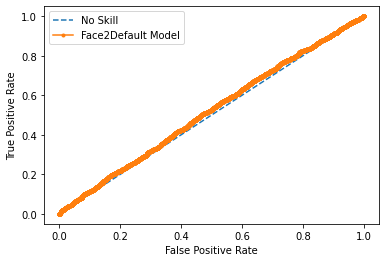

In [83]:
lr_auc = roc_auc_score(final_result_success['flag_bl_fix'], final_result_success['prob0'])
print(lr_auc)
fpr, tpr, thresholds = roc_curve(final_result_success['flag_bl_fix'], final_result_success['prob0'])

pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Face2Default Model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

0.5192604296634908


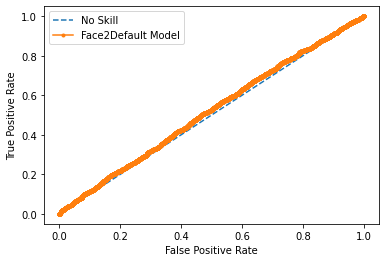

In [84]:
result_sorted = final_result_success.sort_values('prob0')
lr_auc = roc_auc_score(result_sorted['flag_bl_fix'], result_sorted['prob0'])
print(lr_auc)
fpr, tpr, thresholds = roc_curve(result_sorted['flag_bl_fix'], result_sorted['prob0'])

pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Face2Default Model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

0.48073957033650916


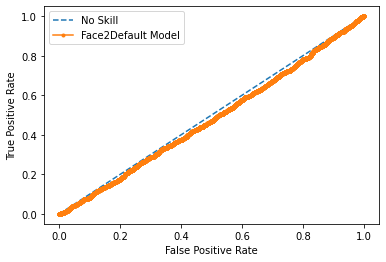

In [85]:
result_sorted = final_result_success.sort_values('prob0')
lr_auc = roc_auc_score(result_sorted['flag_bl'], result_sorted['prob0'])
print(lr_auc)
fpr, tpr, thresholds = roc_curve(result_sorted['flag_bl'], result_sorted['prob0'])

pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Face2Default Model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [88]:
final_result_success['flag_bl'].value_counts()

0    151644
1      1168
Name: flag_bl, dtype: int64